## Importing Libraries

In [102]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Pre-requisite

In [103]:
circles_img = cv2.imread('circles-img.jpeg')

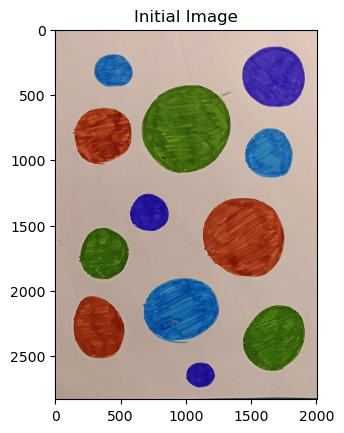

In [104]:
plt.imshow(circles_img)
plt.title('Initial Image')
plt.show()
# cv2.imshow('Original', circles_img)

In [105]:
gray = cv2.cvtColor(circles_img, cv2.COLOR_BGR2GRAY)

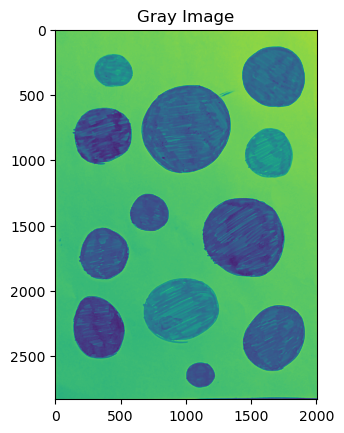

In [106]:
plt.imshow(gray)
plt.title('Gray Image')
plt.show()
# cv2.imshow("Gray", gray)

In [107]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

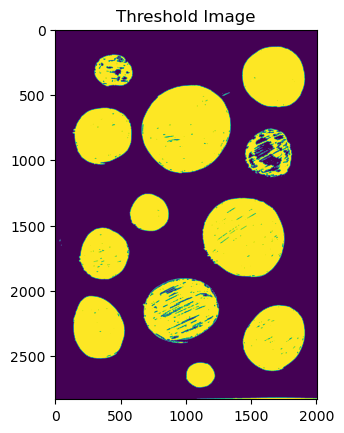

In [108]:
plt.imshow(thresh)
plt.title('Threshold Image')
plt.show()
# cv2.imshow("Thresholded Image", thresh)

## Sure Backgound and Foreground

In [109]:
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN,kernel, iterations = 2)

In [110]:
sure_bg = cv2.dilate(opening, kernel, iterations=3)

In [111]:
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.55 * dist_transform.max(), 255, 0)

In [112]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)

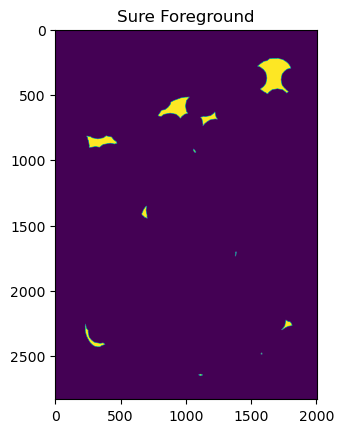

In [113]:
plt.imshow(sure_fg)
plt.title('Sure Foreground')
plt.show()
# cv2.imshow("Sure Foreground", sure_fg)

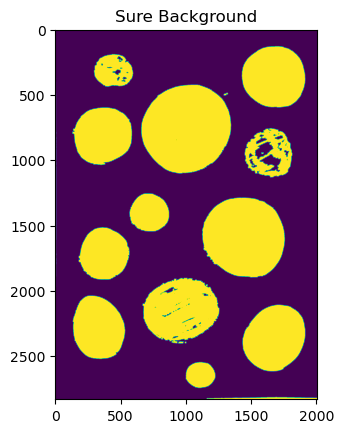

In [114]:
plt.imshow(sure_bg)
plt.title("Sure Background")
plt.show()
# cv2.imshow("Sure Background", sure_bg)

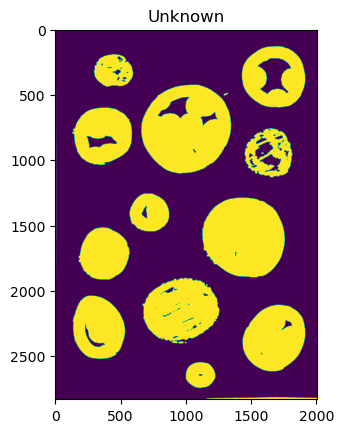

In [115]:
plt.imshow(unknown)
plt.title('Unknown')
plt.show()
# cv2.imshow("Unknown", unknown)

## Assigning Markers

In [116]:
ret, markers = cv2.connectedComponents(sure_fg)

markers = markers+1

markers[unknown==255] = 0

## Applying Watershed

In [117]:
markers = cv2.watershed(circles_img,markers)
circles_img[markers == -1] = [255,0,0]

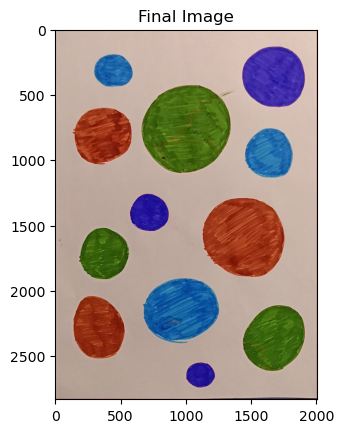

In [118]:
plt.imshow(circles_img)
plt.title("Final Image")
plt.show()
# cv2.imshow("Final Image", circles_img)

In [119]:
print(f"Number of Circles = {ret}")

Number of Circles = 12


In [120]:
# cv2.waitKey(0)
# cv2.destroyAllWindows()